# Exploratory Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from functools import partial # to reduce df memory consumption by applying to_numeric
color = sns.color_palette() # adjusting plotting style
import warnings
warnings.filterwarnings('ignore') # silence annoying warnings

###ER Diagram

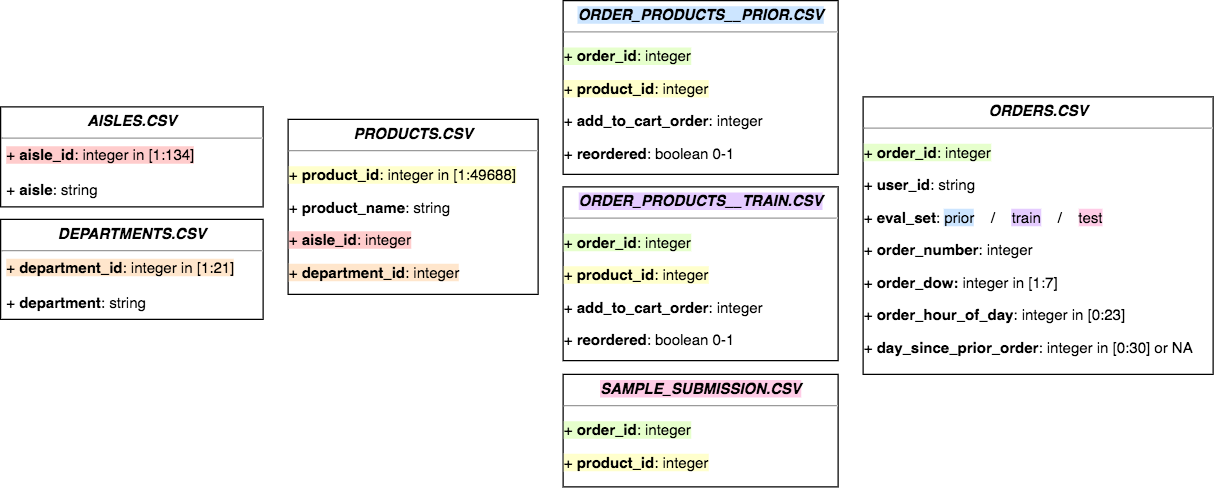

In [3]:
order_products_train = pd.read_csv('/content/drive/MyDrive/Datasets/Instacart/order_products__train.csv')
order_products_prior = pd.read_csv('/content/drive/MyDrive/Datasets/Instacart/order_products__prior.csv')
orders = pd.read_csv('/content/drive/MyDrive/Datasets/Instacart/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/Datasets/Instacart/products.csv')
aisles = pd.read_csv('/content/drive/MyDrive/Datasets/Instacart/aisles.csv')
departments = pd.read_csv('/content/drive/MyDrive/Datasets/Instacart/departments.csv')

### Firstly lets look at order table

In [4]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### At what hours people are ordering the most

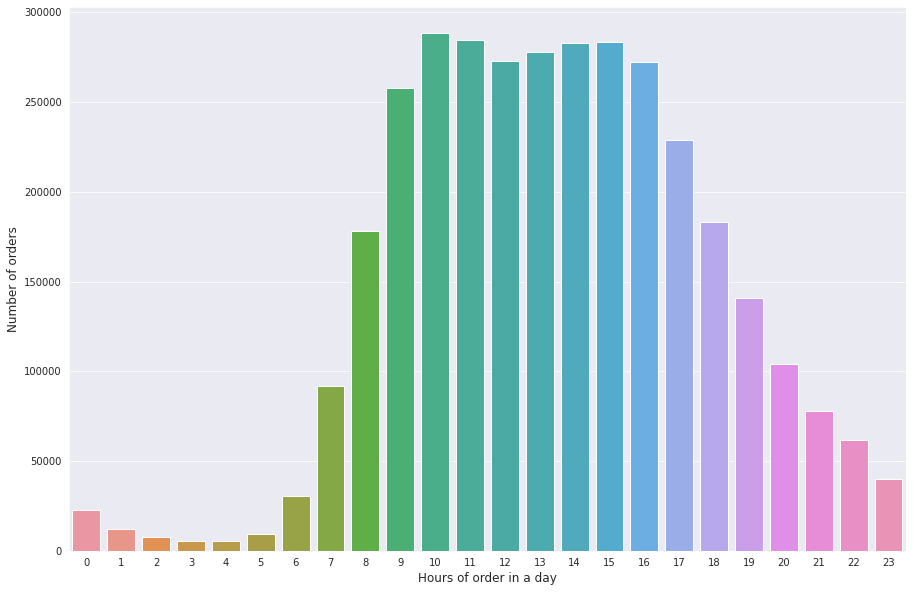

In [5]:
grouped_time = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
grouped_time = grouped_time.order_hour_of_day.value_counts()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped_time.index, grouped_time.values)
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Hours of order in a day', fontsize=12)
plt.show()

Most of the people order after** 9 am** and the statistics are almost steady till **3 pm**, but after 4 pm, numbers of order decline!

### On which days people are ordering the most?

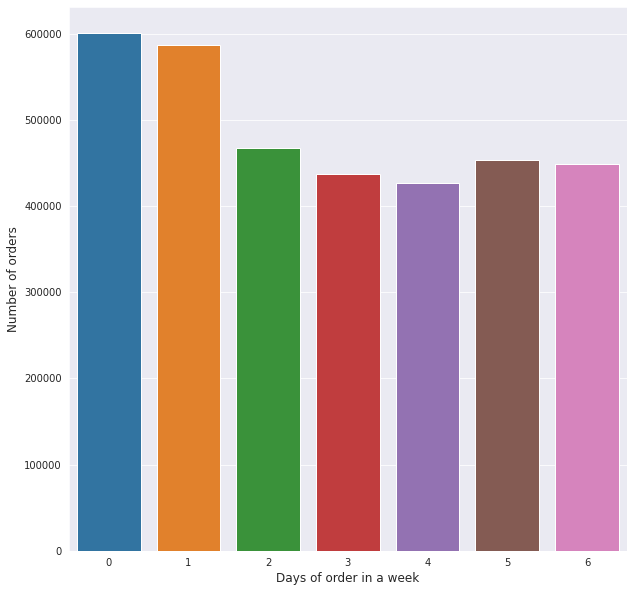

In [6]:
grouped_days = orders.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped_days = grouped_days.order_dow.value_counts()

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(grouped_days.index, grouped_days.values)
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Days of order in a week', fontsize=12)
plt.show()

**Monday** and **Tuesday** are the days in which relative number of orders are lightly higher!

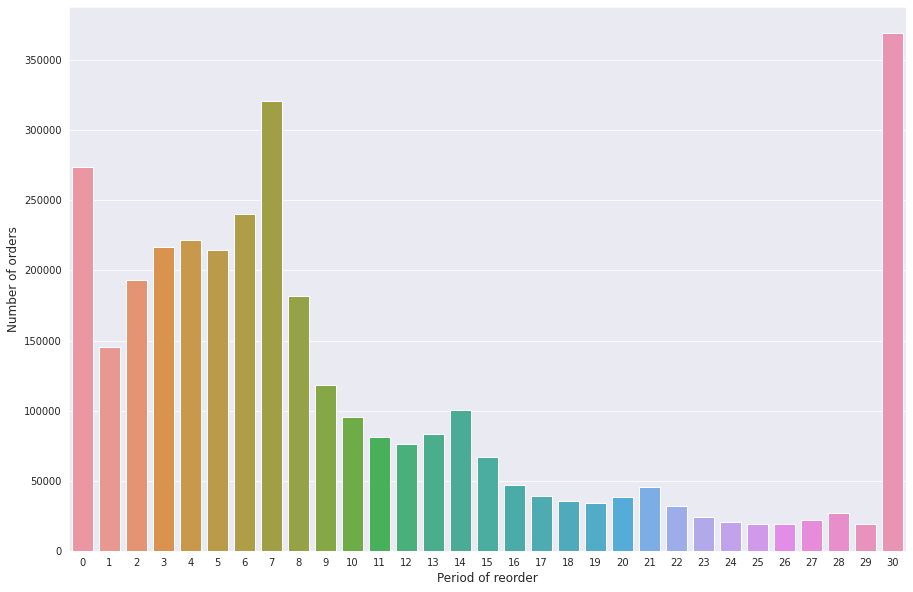

In [7]:
grouped_redays = orders.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
grouped_redays = grouped_redays.days_since_prior_order.value_counts()

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped_redays.index, grouped_redays.values)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Period of reorder', fontsize=12)
plt.show()

**It looks like there are a lot of offers if you reorder on 30th day!, or maybe people tend to buy things monthly more**

Let's look at the order_products_train and order_products_prior files now. The products purchased in each order are listed in these files. More particular, order_products_prior holds the contents of past orders for all customers, whereas order_products_train only includes the contents of recent orders for a subset of customers.

In [8]:
print("The order_products_train size is : ", order_products_train.shape)
print("The order_products_prior size is : ", order_products_prior.shape)

The order_products_train size is :  (1384617, 4)
The order_products_prior size is :  (32434489, 4)


In [9]:
order_products_all = pd.concat([order_products_train, order_products_prior], axis=0)

In [10]:
order_products_all.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
orders_unique = len(set(order_products_all.order_id))
products_unique = len(set(order_products_all.product_id))
print("For %s products there are %s orders" %(products_unique, orders_unique))

For 49685 products there are 3346083 orders


### Count of product orders per customer

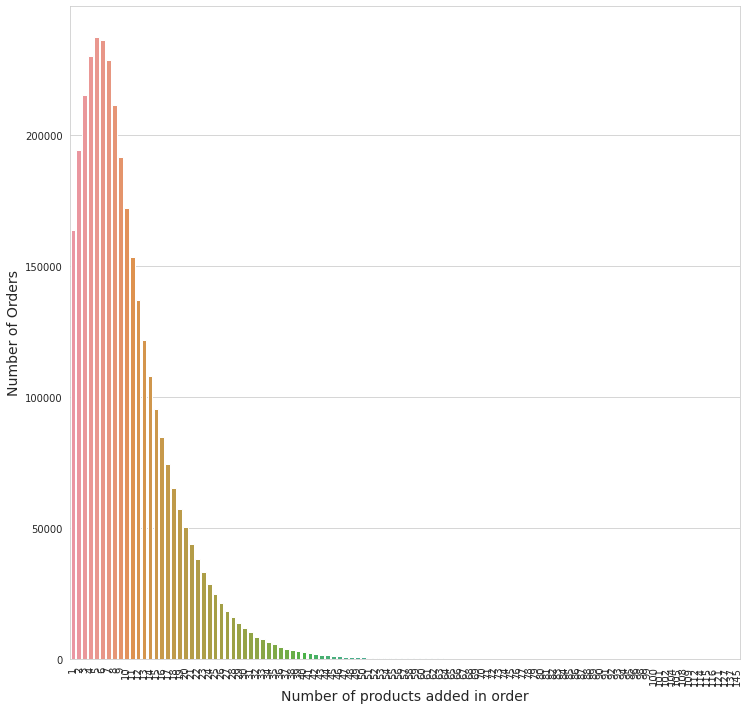

In [12]:
grouped_count = order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped_count = grouped_count.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(12, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped_count.index, grouped_count.values)

plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Number of products added in order', fontsize=14)
plt.show()

Most of the people order around 4 to **6** products

### Most ordered products

In [13]:
grouped = order_products_all.groupby("product_id")["reordered"].aggregate(Total_reorders = 'count').reset_index()
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped

,product_id,Total_reorders,product_name
24849,24852,491291,Banana
13173,13176,394930,Bag of Organic Bananas
21134,21137,275577,Organic Strawberries
21900,21903,251705,Organic Baby Spinach
47205,47209,220877,Organic Hass Avocado
47762,47766,184224,Organic Avocado
47622,47626,160792,Large Lemon
16794,16797,149445,Strawberries
26206,26209,146660,Limes
27842,27845,142813,Organic Whole Milk


*   **Banana & Strawberries** are the most ordered product!!!
*   Fruits are ordered much more than vegetables!




###Least ordered products

In [21]:
grouped = order_products_all.groupby("product_id")["reordered"].aggregate(Total_reorders = 'count').reset_index()
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=True)[:]
grouped.to_csv('Sorted_Ascending_Orderfrequency.csv')

In [23]:
grouped[:10]

,product_id,Total_reorders,product_name
36230,36233,1,Water With Electrolytes
11251,11254,1,Drink Distinct All Natural Soda Pineapple Coco...
43095,43098,1,Buddy Bear Probiotic Orange Flavor Chewable
14482,14485,1,Organic Ice Cream Birthday Cake
7623,7626,1,Brut Prosecco
49536,49540,1,Pure Squeezed Lemonade
33094,33097,1,Piquillo & Jalapeno Bruschetta
46376,46379,1,Skin Firming Cellulite Gel Cream
5253,5255,1,Chardonnay Carneros
35887,35890,1,Petite Black Eyed Peas


### Are people ordering the previously ordered product?

In [15]:
grouped_prevre = order_products_all.groupby("reordered")["product_id"].aggregate(Total_products = 'count').reset_index()
grouped_prevre['Ratios'] = grouped_prevre["Total_products"].apply(lambda x: x /grouped_prevre['Total_products'].sum())
grouped_prevre

,reordered,Total_products,Ratios
0,0,13863746,0.409938
1,1,19955360,0.590062


**59%** of the products ordered are the ones that were previously ordered by the customer

### Products which are mostly reordered?

In [16]:
grouped_reorder = order_products_all.groupby("product_id")["reordered"].aggregate(reorder_sum = 'sum',reorder_total = 'count').reset_index()
grouped_reorder['reorder_probability'] = grouped_reorder['reorder_sum'] / grouped_reorder['reorder_total']
grouped_reorder = pd.merge(grouped_reorder, products[['product_id', 'product_name']], how='left', on=['product_id'])

grouped_reorder = grouped_reorder[grouped_reorder.reorder_total > 75].sort_values(['reorder_probability'], ascending=False)[:10]
grouped_reorder

,product_id,reorder_sum,reorder_total,reorder_probability,product_name
2074,2075,84,90,0.933333,Serenity Ultimate Extrema Overnight Pads
27737,27740,94,102,0.921569,Chocolate Love Bar
35601,35604,93,104,0.894231,Maca Buttercups
38248,38251,99,111,0.891892,Benchbreak Chardonnay
36798,36801,88,99,0.888889,Organic Blueberry B Mega
10233,10236,114,131,0.870229,Fragrance Free Clay with Natural Odor Eliminat...
20595,20598,99,114,0.868421,Thousand Island Salad Snax
5455,5457,78,90,0.866667,Classic Carbonated Natural Mineral Water
35493,35496,394,457,0.862144,Real2 Alkalized Water 500 ml
9289,9292,2580,2995,0.861436,Half And Half Ultra Pasteurized


**Sanitary Pads** , **Chocolates** and some **Personal care** items tops the reorderd list

### Which departments are most important?

In [17]:
items  = pd.merge(left =pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


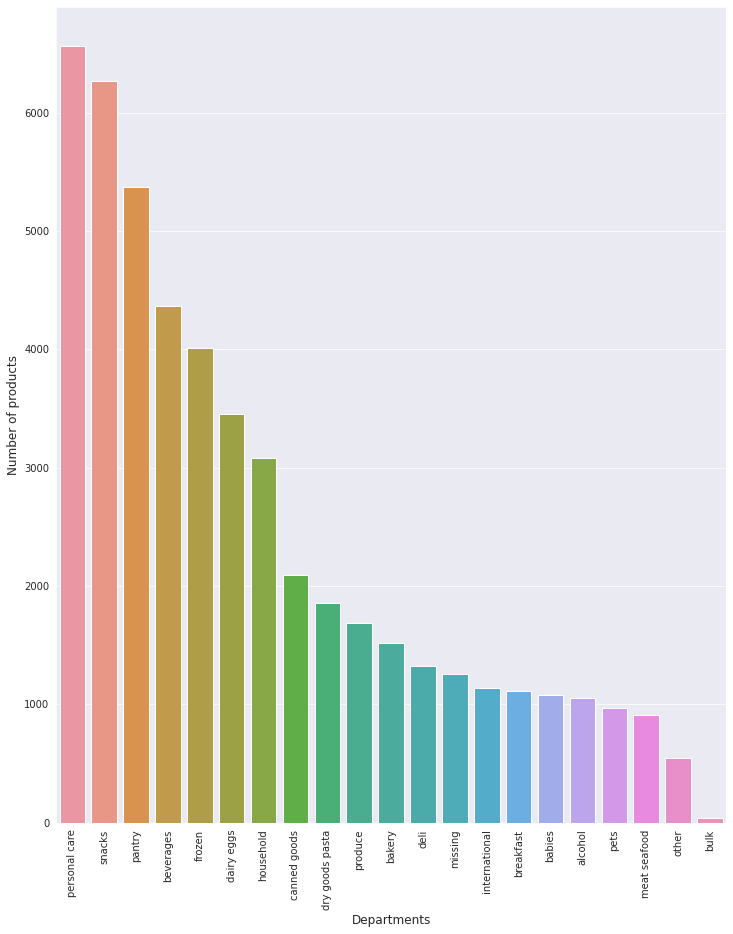

In [18]:
grouped_dept = items.groupby("department")["product_id"].aggregate(Total_products = 'count').reset_index()
grouped_dept['Ratio'] = grouped_dept["Total_products"].apply(lambda x: x /grouped_dept['Total_products'].sum())

grouped_dept  = grouped_dept.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped_dept.index, grouped_dept.values)
plt.ylabel('Number of products', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.show()

*   **Personal Care**, **Snacks** and **Pantry** department tops the list
*   Daily needed stuff departments, such as **Dairy**, **Frozen Food** and **bakery** are very important



In [30]:
grouped_dept = items.groupby("department")["product_id"].aggregate(Total_products = 'count').reset_index()
grouped_dept['Ratio'] = grouped_dept["Total_products"].apply(lambda x: x /grouped_dept['Total_products'].sum())
grouped_dept  = grouped_dept.groupby(['department']).sum()['Total_products'].sort_values(ascending=True)
grouped_dept.to_csv('Sorted_Asc_Departments.csv')

### Which Aisles are the most important?

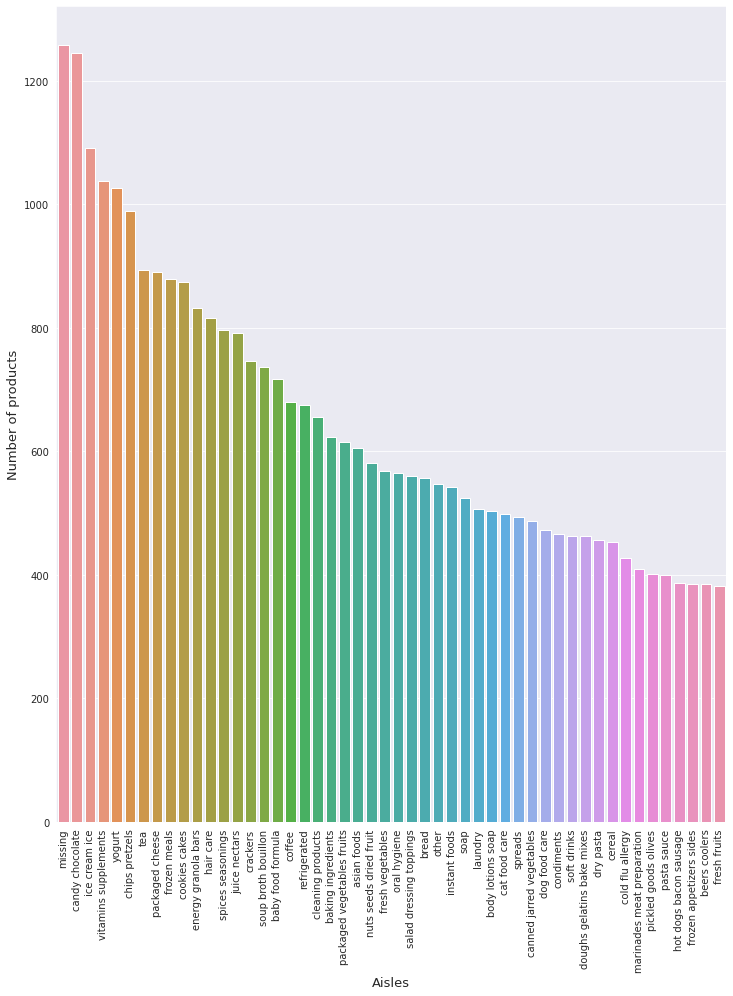

In [26]:
grouped_aisles = items.groupby("aisle")["product_id"].aggregate(Total_products='count').reset_index()
grouped_aisles['Ratio'] = grouped_aisles["Total_products"].apply(lambda x: x /grouped_aisles['Total_products'].sum())
grouped_aisles  = grouped_aisles.groupby(['aisle']).sum()['Total_products'].sort_values(ascending=False)[:50]

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped_aisles.index, grouped_aisles.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

**Chocolate and Ice-Cream** VS **Vitamin Supplement and Yougurt**




###Least Important Aisles

In [34]:
grouped_aisles = items.groupby("aisle")["product_id"].aggregate(Total_products='count').reset_index()
grouped_aisles['Ratio'] = grouped_aisles["Total_products"].apply(lambda x: x /grouped_aisles['Total_products'].sum())
grouped_aisles  = grouped_aisles.groupby(['aisle']).sum()['Total_products'].sort_values(ascending=True)[:]
grouped_aisles[:21]

aisle
bulk dried fruits vegetables      12
bulk grains rice dried goods      26
packaged produce                  32
baby accessories                  44
frozen juice                      47
seafood counter                   54
trail mix snack mix               69
packaged seafood                  80
frozen breads doughs              81
poultry counter                   82
ice cream toppings                85
fresh herbs                       86
specialty wines champagnes        95
refrigerated pudding desserts     98
packaged poultry                  99
packaged meat                    100
meat counter                     105
indian foods                     108
frozen dessert                   112
trash bags liners                112
eye ear care                     113
Name: Total_products, dtype: int64

In [32]:
grouped_aisles.to_csv('Sorted_Asc_Aisles.csv')